In [1]:
import os, sys
import matplotlib.pyplot as plt 
import seaborn
import matplotlib
import numpy as np 
import math 
import matplotlib
import pandas as pd
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


color_list = ['tab:orange',
            'tab:blue',
            'tab:green',
            'tab:red',
            'tab:purple',
            'tab:brown',
            'tab:pink',
            'tab:gray',
            'tab:olive',
            'tab:cyan']

hatch_list = [
    '', 
    '/', 
    '\\'
    '///', 
    '--', 
    '+', 
    'x'
    '*', 
    'o', 
    'O', 
    '.'
]

line_style_list = [
    '-', 
    '--', 
    '-.', 

]

marker_list = [
    '',
    'o', 
    'v',
    '^', 
    'X', 
    'D'
    's', 
]

template = {
    'fontsize': 18, 
    'linewidth': 6, 
    'scatter_markersize': 400, 
    'line_markersize': 20, 
    'width': 0.3, 
}

def autolabel_percent(rects, ax, value_list, error_list=None, str_func=None):
    if str_func is None: 
        str_func = lambda x: '%.2f'%(x)

    if error_list is None: 
        error_list = [0 for _ in value_list]

    for idx, rect in enumerate(rects):
        if value_list[idx] is None: continue
        height = rect.get_height()
        ax.annotate(str_func(value_list[idx]),
                    xy=(rect.get_x() + rect.get_width() / 2, height+error_list[idx]),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='light')


def check_before_run(**kwargs): 
    if   kwargs['full'] + kwargs['half'] + kwargs['forth'] > 1: 
        return False 
    return True 


def apply_grid(ax, **kwargs): 
    if kwargs.get('grid'): 
        if not (kwargs.get('ygrid') or kwargs.get('xgrid')): 
            ax.grid(linestyle='-.', linewidth=1, alpha=0.5)

    if kwargs.get('ygrid'): 
        ax.grid(linestyle='-.', linewidth=1, alpha=0.5, axis='y')
    if kwargs.get('xgrid'): 
        ax.grid(linestyle='-.', linewidth=1, alpha=0.5, axis='x')


def apply_spine(ax, **kwargs): 
    if kwargs.get('spines'): 
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')


def apply_font(kwargs): 
    font = {'family' : 'serif',
            'size'   : 18}
    if kwargs.get('font'): 
        font.update(kwargs.get('font'))
    matplotlib.rc('font', **font)


def apply_log(ax, **kwargs): 
    if kwargs.get('logx'): 
        ax.set_xscale('log', basex=kwargs.get('logx'))
    if kwargs.get('logy') > 0: 
        ax.set_yscale('log', basey=kwargs.get('logy'))

def init_plot(ncols, **kwargs): 
    # if len(kwargs) > 0: 
    #     assert check_before_run(kwargs)
    
    apply_font(kwargs)
    fig, axes = matplotlib.pyplot.subplots(1, ncols)
    if ncols == 1: 
        axes = [axes]
    fig.set_size_inches(w=ncols* 6, h=3)

    for ax in axes: 
        apply_grid(ax, **kwargs)
        apply_spine(ax, **kwargs)
        apply_log(ax, **kwargs)

    return fig, axes 



In [15]:

def plot_bar_by_method(ax, info_by_method, **kwargs): 
    width = kwargs.get('width', 0.3)
    interval = int(math.ceil(width * len(info_by_method)) * 1.5)
    if kwargs.get('norm'): 
        norm_list = list() 
    
    for idx, (ident, y_list, error_list) in enumerate(info_by_method): 
        x_list = list() 
        base = width * ( (len(info_by_method) - 1) // 2 + 0.5 * (len(info_by_method) - 1) % 2 ) + idx * width
        value_list = list() 
        for idy, y in enumerate(y_list): 
            x_list.append(base + idy * interval)
            value_list.append(y)
        
        if error_list is None: 
            error_list = [0 for _ in y_list]
        
        def cap(value): 
            return value 
            # if value < 5: 
            #     return value 
            # else: 
            #     return 5 + (value - 5) / 5
        value_list = [cap(value) for value in  value_list]
        
        if kwargs.get('barh', False) == True: 
            rect = ax.barh(x_list, value_list, xerr=error_list, height=width, color=color_list[idx], hatch=hatch_list[idx], alpha=0.75, edgecolor='black', capsize=0, label=ident)
        else:
            rect = ax.bar(x_list, value_list, yerr=error_list, width=width, color=color_list[idx], hatch=hatch_list[idx], alpha=0.75, edgecolor='black', capsize=0, label=ident) 

        print('x_list', x_list)    
        print('y_list', y_list)
        if kwargs.get('autolabel'): 
            #autolabel_percent(rects, ax, value_list, error_list=None, str_func=None):
            str_func = None 
            if kwargs.get('norm'): 
                str_func = lambda x: '%.1f'%(x)
            elif 'int' in str(type(y_list[0])):
                str_func = lambda x: '%d'%(x)
            print('value_list {}'.format(value_list))
            autolabel_percent(rect, ax, value_list, error_list=error_list, str_func=str_func)




In [16]:
def cal_jct(df): 
    num_job = 1.0 * len(df)
    jct = 0
    min_time = sys.maxsize
    max_time = 0
    jct_list = list() 
    for idx, job in df.iterrows(): 
        jct += (job.completion_time - job.submission_time) / num_job
        min_time = min(job.submission_time, min_time)
        max_time = max(job.completion_time, max_time)
        jct_list.append((job.completion_time - job.submission_time))
    return jct, max(jct_list) # max_time - min_time

def cal_fft(df): 
    unfairs = 0 
    for idx, job in df.iterrows(): 
        if job.finish_time_fairness > 1: 
            unfairs += 1
    num_job = len(df)
    return unfairs / num_job
                        

In [17]:
if True: 
    import glob 
    model_name_list = ['roberta-base','roberta-large', 'vit', 'vit-large', ]

    info_by_method = list()
    fairness_info_by_method = list() 
    makespan_info_by_method = list()
    for data_num in ['3', '6', '9']:
        jct_list = list() 
        fairness_list = list() 
        makespan_list = list() 
        for model_name in model_name_list:
            
            for trace_path in sorted(glob.glob('../trace/Data/FM-*')): 
                if os.path.isdir(trace_path) and (model_name in trace_path and '{}-large'.format(model_name) not in trace_path):  
#                     print(trace_path)
                    trace_ident = os.path.basename(trace_path)
                    if data_num not in trace_ident: continue 
                    jct_info = dict() 
                    makespan_info = dict() 
                    fairness_info = dict() 
                    
                    for accelerate in ['True', 'False']:
                        csv_name = os.path.join('../result/', 'data', trace_ident, 'titan-{}'.format(accelerate), '{}.csv'.format('titan'))
                        df = pd.read_csv(csv_name)
                        jct_info[accelerate], makespan_info[accelerate] = cal_jct(df)

                        csv_name = os.path.join('../result/', 'data', trace_ident, 'titan-{}'.format(accelerate), '{}_fairness.csv'.format('titan'))
                        df = pd.read_csv(csv_name) 

                        fairness_info[accelerate] = cal_fft(df) 
                    
                    jct_list.append(jct_info['False'] / (jct_info['True'] ) )
                    makespan_list.append(makespan_info['False'] / makespan_info['True'])
                    fairness_list.append(fairness_info['False'] / (fairness_info['True'] + 1e-3))
                                    


        sched_verbose = ''
        info_by_method.append([data_num, jct_list, [0 for jct in jct_list]])
        makespan_info_by_method.append([data_num, makespan_list, [0 for jct in jct_list]])
        fairness_info_by_method.append([data_num, fairness_list, [0 for jct in jct_list]])
    
print(makespan_info)


{'True': 3201.6544523239136, 'False': 4996.827226161957}


# Fairness Improvement

x_list [1.2, 3.2, 5.2, 7.2]
y_list [0.0, 0.0, 0.0, 0.0]
value_list [0.0, 0.0, 0.0, 0.0]
x_list [1.7999999999999998, 3.8, 5.8, 7.8]
y_list [0.0, 0.0, 0.0, 0.0]
value_list [0.0, 0.0, 0.0, 0.0]
x_list [2.4, 4.4, 6.4, 8.4]
y_list [0.9892086330935251, 0.0, 0.0, 0.0]
value_list [0.9892086330935251, 0.0, 0.0, 0.0]


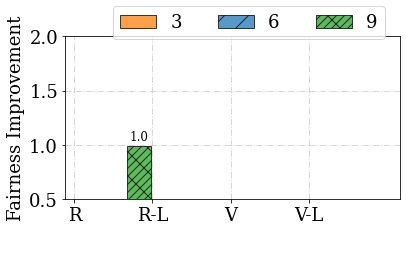

In [10]:
xlabel_list = ['R', 'R-L', 'V', 'V-L']
if True: 
    template.update(
        {
            "norm": False, 
            "width": 0.6, 
            "autolabel": True, 
            'norm': True,
            'logy': 0,
            'logx': 0,
            'barh': False,
        }
    )
    fig, axes = init_plot(1, grid=True, logy=template.get('logy', 0), logx=template.get('logx', 0))

    for ax in axes: 
        plot_bar_by_method(ax, fairness_info_by_method, **template)
        # ax.set_xlim(-0.5, 4)
        ax.set_ylim(0.5, 2)
        ax.set_ylabel('Fairness Improvement', fontsize=template['fontsize'])
        # import pdb; pdb.set_trace() 
#         ax.spines['right'].set_visible(False)
#         ax.spines['top'].set_visible(False)
        # axes_list = [1.2, 3.2, 5.2, 7.2]
        axes_list = [0.8999999999999999, 2.9, 4.9, 6.9]
        if True: 
            ax.set_xticks([val - 0.15 for val in axes_list])
            ax.set_xticklabels(xlabel_list, fontsize=template['fontsize'], rotation=0)
        else: 
            
            ax.set_xticks([val + 1.5 for val in axes_list])
            ax.set_xticklabels(['1.0', '1.5', '2.0'], fontsize=template['fontsize'], rotation=0)
        # ax.set_xlabel('Relative Workload Density', fontsize=template['fontsize'])
    # plt.legend() 
    # fig.legend(fontsize=template['fontsize'], loc='upper center', ncol=3)
    fig.legend(fontsize=template['fontsize'], loc='upper center', ncol=3, bbox_to_anchor=(0.55, 1.06), fancybox=True, shadow=False) 
    plt.savefig('images/data/fairness.jpg', bbox_inches='tight') 
    plt.savefig('images/data/fairness.pdf', bbox_inches='tight') 
    plt.show()

#     plt.savefig(save_path, bbox_inches='tight') 
#     plt.close() 

# makespan improvement 

x_list [1.2, 4.2, 7.2, 10.2]
y_list [1.3142339498858715, 1.0, 1.0385187972093102, 0.9224480138793072]
value_list [1.3142339498858715, 1.0, 1.0385187972093102, 0.9224480138793072]
x_list [1.7999999999999998, 4.8, 7.8, 10.8]
y_list [1.2427953884733056, 1.0, 2.1523343239733603, 2.160960789708433]
value_list [1.2427953884733056, 1.0, 2.1523343239733603, 2.160960789708433]
x_list [2.4, 5.4, 8.4, 11.4]
y_list [1.6489221524921456, 1.0, 1.8739786015709308, 1.5607015999290683]
value_list [1.6489221524921456, 1.0, 1.8739786015709308, 1.5607015999290683]


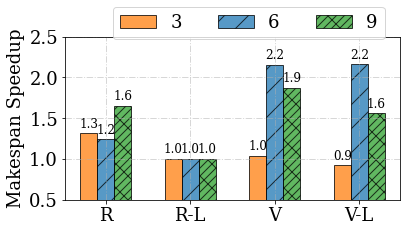

In [25]:
xlabel_list = ['R', 'R-L', 'V', 'V-L']
if True: 
    template.update(
        {
            "norm": False, 
            "width": 0.6, 
            "autolabel": True, 
            'norm': True,
            'logy': 0,
            'logx': 0,
            'barh': False,
        }
    )
    fig, axes = init_plot(1, grid=True, logy=template.get('logy', 0), logx=template.get('logx', 0))

    for ax in axes: 
        plot_bar_by_method(ax, makespan_info_by_method, **template)
        # ax.set_xlim(-0.5, 4)
        ax.set_ylim(0.5, 2.5)
        ax.set_ylabel('Makespan Speedup', fontsize=template['fontsize'])
        # import pdb; pdb.set_trace() 
#         ax.spines['right'].set_visible(False)
#         ax.spines['top'].set_visible(False)
        # axes_list = [1.2, 3.2, 5.2, 7.2]
        axes_list = [1.7999999999999998, 4.8, 7.8, 10.8]
        if True: 
            ax.set_xticks([val for val in axes_list])
            ax.set_xticklabels(xlabel_list, fontsize=template['fontsize'], rotation=0)
        else: 
            
            ax.set_xticks([val + 1.5 for val in axes_list])
            ax.set_xticklabels(['1.0', '1.5', '2.0'], fontsize=template['fontsize'], rotation=0)
        # ax.set_xlabel('Relative Workload Density', fontsize=template['fontsize'])
    # plt.legend() 
    # fig.legend(fontsize=template['fontsize'], loc='upper center', ncol=3)
    fig.legend(fontsize=template['fontsize'], loc='upper center', ncol=3, bbox_to_anchor=(0.55, 1.06), fancybox=True, shadow=False) 
    plt.savefig('images/data/makespan.jpg', bbox_inches='tight') 
    plt.savefig('images/data/makespan.pdf', bbox_inches='tight') 
    plt.show()

#     plt.savefig(save_path, bbox_inches='tight') 
#     plt.close() 

In [12]:
makespan_info_by_method

[['3',
  [1.3142339498858715, 1.0, 1.0385187972093102, 0.9224480138793072],
  [0, 0, 0, 0]],
 ['6',
  [1.2427953884733056, 1.0, 2.1523343239733603, 2.160960789708433],
  [0, 0, 0, 0]],
 ['9',
  [1.6489221524921456, 1.0, 1.8739786015709308, 1.5607015999290683],
  [0, 0, 0, 0]]]

# JCT Improvement 

x_list [1.2, 4.2, 7.2, 10.2]
y_list [1.4791018675006666, 1.1991183345470544, 1.1765469856448536, 1.1259411535626869]
value_list [1.4791018675006666, 1.1991183345470544, 1.1765469856448536, 1.1259411535626869]
x_list [1.7999999999999998, 4.8, 7.8, 10.8]
y_list [1.2236488296214492, 1.0526015499197237, 1.9373560383321085, 1.7104467929525913]
value_list [1.2236488296214492, 1.0526015499197237, 1.9373560383321085, 1.7104467929525913]
x_list [2.4, 5.4, 8.4, 11.4]
y_list [1.547615943207407, 1.2672296423309821, 1.4109040936531054, 1.6868881633663289]
value_list [1.547615943207407, 1.2672296423309821, 1.4109040936531054, 1.6868881633663289]


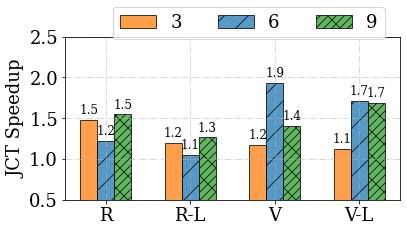

In [26]:
if True: 
    template.update(
        {
            "norm": False, 
            "width": 0.6, 
            "autolabel": True, 
            'norm': True,
            'logy': 0,
            'logx': 0,
            'barh': False,
        }
    )
    fig, axes = init_plot(1, grid=True, logy=template.get('logy', 0), logx=template.get('logx', 0))

    for ax in axes: 
        plot_bar_by_method(ax, info_by_method, **template)
        # ax.set_xlim(-0.5, 4)
        ax.set_ylim(0.5, 2.5)
        ax.set_ylabel('JCT Speedup', fontsize=template['fontsize'])
        # import pdb; pdb.set_trace() 
#         ax.spines['right'].set_visible(False)
#         ax.spines['top'].set_visible(False)
        # axes_list = [1.2, 3.2, 5.2, 7.2]
        axes_list = [1.7999999999999998, 4.8, 7.8, 10.8]
        if True: 
            ax.set_xticks([val for val in axes_list])
            ax.set_xticklabels(xlabel_list, fontsize=template['fontsize'], rotation=0)
        else: 
            
            ax.set_xticks([val + 1.5 for val in axes_list])
            ax.set_xticklabels(['1.0', '1.5', '2.0'], fontsize=template['fontsize'], rotation=0)
        # ax.set_xlabel('Relative Workload Density', fontsize=template['fontsize'])
    # plt.legend() 
    # fig.legend(fontsize=template['fontsize'], loc='upper center', ncol=3)
    fig.legend(fontsize=template['fontsize'], loc='upper center', ncol=3, bbox_to_anchor=(0.55, 1.06), fancybox=True, shadow=False) 
    plt.savefig('images/data/jct.jpg', bbox_inches='tight') 
    plt.savefig('images/data/jct.pdf', bbox_inches='tight') 
    plt.show()

#     plt.savefig(save_path, bbox_inches='tight') 
#     plt.close() 